# Infoli Task Inspector

In [62]:
import import_ipynb
from infoliLauncher import infoliTask, pklFile
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

This notebook gives the possibility to inspect the list of tasks saved in the file defined by `pklFile` while the `infoliLauncher` notebook is still running simulations.

In [63]:
with open(pklFile, "rb") as f:
    listOfTasks = pkl.load(f)

In [68]:
listOfTasks[2].getData()

{'parameters': {'simTime': 0.003,
  'connectivity': 0.5351733882550728,
  'neurons': 8521,
  'memory': 4096,
  'CPU': 4,
  'timeout': 14400},
 'results': {'hasExecuted': True,
  'setupTime': 0.65,
  'execTime': 1667.6,
  'startTime': 1582723366.9136477,
  'endTime': 1582725036.1730764,
  'measureTime': 1669.2594287395477,
  'hasEndedInTimeout': False,
  'hasEndedInError': False}}

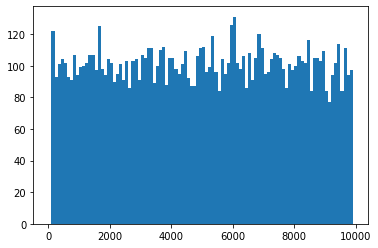

In [65]:
plt.hist([task.getData()['parameters']['neurons'] for task in listOfTasks],bins=np.arange(100)*100);

In [66]:
[task.getData()['results']['execTime'] for task in listOfTasks if task.getData()['results']['hasExecuted']]

[625.24, 1629.7, 1667.6]